<a href="https://colab.research.google.com/github/StefaniaRojas/Mineria-de-datos/blob/main/Pas_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= blue> <b> Análisis Descriptivo y Modelamiento de Series de Tiempo </b> </i> <font> 

###### **Presentado por:**
> Laura Carolina Rincón Ochoa\
  Stefanía Rojas García

Para el análisis y modelamiento de las series de tiempo, se utilizaron datos diarios de la temperatura en Bogotá desde el 01 de enero del 2017 hasta el 31 de diciembre del 2021 y datos mensuales de Pasajeros en Colombia desde el año 2004 hasta el año 2015, que contemplan todos los vuelos que tuvieron pasajeros en esos años.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### <font color= 199EDC> <b> Librerías </b> </font>

In [4]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 9.9 MB 43.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [5]:
pip install ax-platform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 403 kB 66.5 MB/s 
     |████████████████████████████████| 145 kB 60.2 MB/s 
     |████████████████████████████████| 727 kB 46.5 MB/s 
     |████████████████████████████████| 245 kB 57.2 MB/s 


In [6]:
pip install SQLAlchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 56.1 MB/s 


In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import io, requests
import sqlalchemy
import random
import plotly.express as px
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
import statsmodels as sm
import statsmodels.api as smapi
import pmdarima as pm
from tensorflow.keras import layers
import math
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pylab as plt
import sklearn
from matplotlib import pyplot
from matplotlib.pyplot import figure
from matplotlib.pylab import rcParams
from sqlalchemy import create_engine
from sklearn.impute import KNNImputer
from statsmodels.tsa.api import STLForecast
from pandas.plotting import scatter_matrix
import tensorflow.keras as keras
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn.tree import DecisionTreeRegressor
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

In [9]:
import rpy2.robjects as r
%reload_ext rpy2.ipython

### <font color= F30720> <b> <i> Pasajeros en Colombia mensuales desde 2004 hasta 2015 </i> </b> </font>
La serie de Pasajeros en Colombia presenta valores desde el año 2004 hasta el año 2015, y contempla todos los vuelos que se presentaron.
Esta serie cuenta con un total de 144 registros.


#### <font color= #199EDC> <b> Importación de datos  </b> </font>

In [10]:
traf4 = pd.read_excel("/content/drive/Shareddrives/Series/traf2004.xlsx")
traf5 = pd.read_excel("/content/drive/Shareddrives/Series/traf2005.xlsx")
traf6 = pd.read_excel("/content/drive/Shareddrives/Series/traf2006.xlsx")
traf7 = pd.read_excel("/content/drive/Shareddrives/Series/traf2007.xlsx")
traf8 = pd.read_excel("/content/drive/Shareddrives/Series/traf2008.xlsx")
traf9 = pd.read_excel("/content/drive/Shareddrives/Series/traf2009.xlsx")
traf10 = pd.read_excel("/content/drive/Shareddrives/Series/traf2010.xlsx")
traf11 = pd.read_excel("/content/drive/Shareddrives/Series/traf2011.xlsx")
traf12 = pd.read_excel("/content/drive/Shareddrives/Series/traf2012.xlsx")
traf13 = pd.read_excel("/content/drive/Shareddrives/Series/traf13.xlsx")
traf14 = pd.read_excel("/content/drive/Shareddrives/Series/traf2014.xlsx")
traf15 = pd.read_excel("/content/drive/Shareddrives/Series/traf2015.xlsx")

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning:

Cannot parse header or footer so it will be ignored



In [11]:
a = traf4.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
b = traf5.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
c = traf6.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
d = traf7.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
e = traf8.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
f = traf9.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
g = traf10.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
h = traf11.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
i = traf12.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
j = traf13.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
k = traf14.groupby(by=['AÑO','MES']).sum('Pasajeros')['Pasajeros']
l = traf15.groupby(by=['Año','Mes']).sum('Pasajeros')['Pasajeros']

In [12]:
Pasajeros = pd.DataFrame(pd.concat([a,b,c,d,e,f,g,h,i,j,k,l]))
Fecha = pd.date_range(start='2004-01-01', end='2015-12-31', freq='M')                      
Pasajeros['Fecha'] = Fecha
Pasajeros = Pasajeros.set_index('Fecha')
Pasajerosst = Pasajeros['Pasajeros']
print(type(Pasajerosst))
print(Pasajeros.head())                   

<class 'pandas.core.series.Series'>
            Pasajeros
Fecha                
2004-01-31    1177142
2004-02-29     938110
2004-03-31     982814
2004-04-30     981508
2004-05-31     967385


Text(0.5, 0, 'Mes')

Text(0, 0.5, 'Pasajeros')

Text(0.5, 1.0, 'Número de Pasajeros en aerolineas colombianas')

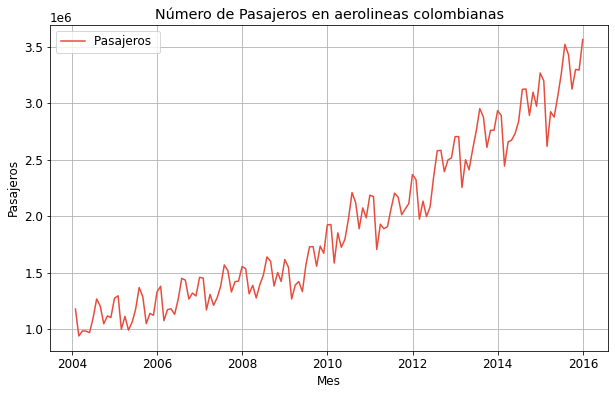

In [13]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Pasajerosst, color='#E74C3C', label='Pasajeros ')
ax.set_xlabel('Mes')
ax.set_ylabel('Pasajeros')
ax.set_title('Número de Pasajeros en aerolineas colombianas')
ax.grid(True)
ax.legend(loc='upper left')

Al observar el gráfico la serie parece presentar tendencia deterministica positiva, no parece ser estacionaria y parece presentar ciclos, además parece presentar varianza marginal no constante.   

Se trabajará con la serie sin transformar. Los retardos y el número de pasajeros mensuales parecen presentar una correlación lineal positiva entre ellos. Hay un decaimiento lento del ACF lo cual puede indicar la presencia de tendencia y las primeras 12 ACF son significativas, además en PACF las autocorrelaciones cercanas al rezago 12 son significativas, lo cual podría indicar una posible estacionalidad. Hay presencia de raices unitarias y se diferenció. Se detectó de igual manera, una componente estacional, de periodo 12.

#### <font color= 199EDC> <b> Ajustes del modelo </b> </font>
Para el ajuste de los modelos se usan el 70% de datos como conjunto de entrenamiento, el 20% como conjunto de validación y el 10% restante como conjunto de prueba.

In [14]:
n = len(Pasajeros)
train = Pasajeros[0:int(n*0.9)]
train_df = Pasajeros[0:int(n*0.7)]
val_df = Pasajeros[int(n*0.7):int(n*0.9)]
test_df = Pasajeros[int(n*0.9):] 

### <font color= 199EDC> <b> Modelo SARIMA (p,d,q)(P,D,Q) </b> </font>



#### <font color= 199EDC> <b> Raices unitarias </b> </font>

In [16]:
adfstat, pvalue, critvalues, resstore=adfuller(Pasajerosst,regression="nc",maxlag=12,autolag=None,store=True,regresults=True)
print(resstore.resols.summary())

resultadoadf1=adfuller(Pasajerosst,regression="nc", maxlag=12)
print('ADF Statistic: %f' % resultadoadf1[0])
print('P-value: %f' % resultadoadf1[1])
for key, value in resultadoadf1[4].items():
    print('\t%s: %.3f' % (key, value))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              54.69
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    1.24e-43
Time:                        14:49:01   Log-Likelihood:                         -1644.7
No. Observations:                 131   AIC:                                      3315.
Df Residuals:                     118   BIC:                                      3353.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



Como se puede observar en la prueba de Dicky - Fuller hay presencia de una raíz unitaria, por lo tanto se procede a diferenciar ordinariamente.

#### <font color= 199EDC> <b> Serie Diferenciada 1</b> </font>

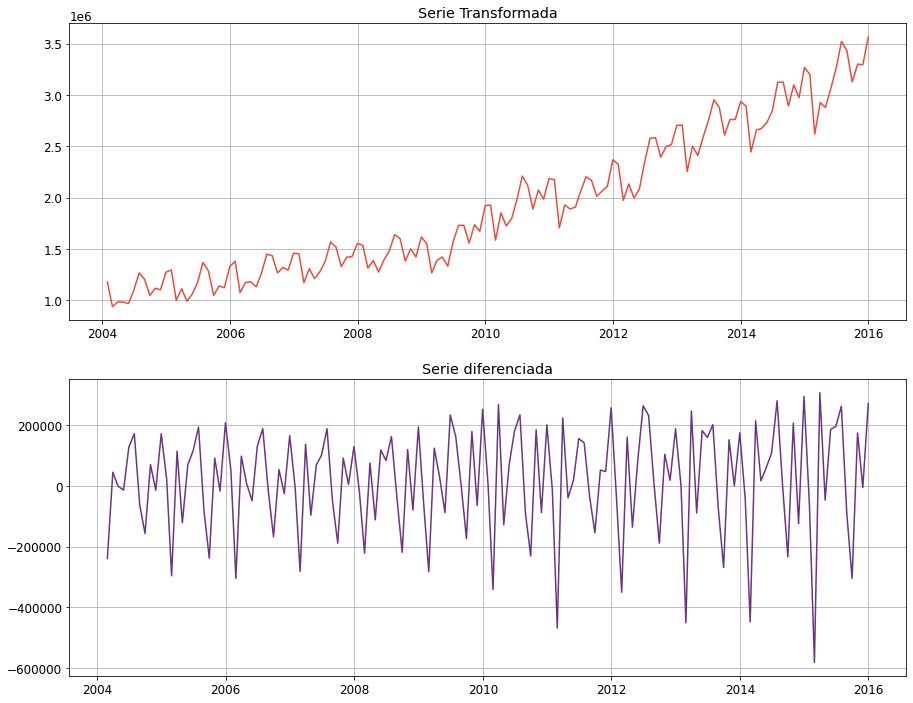

In [17]:
dpasst=Pasajerosst.diff(periods=1)

InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Pasajerosst, color='#E74C3C', label='Pasajeros')
axes[0].title.set_text('Serie Transformada')
axes[0].grid(True)
axes[1].plot(dpasst, color='#6C3483')
axes[1].title.set_text('Serie diferenciada')
axes[1].grid(True)
plt.show()

#### <font color= 199EDC> <b> Raices Unitarias Estacionales </b> </font>

In [18]:
pm.arima.nsdiffs(dpasst.dropna(), 12 , max_D=2, test='ocsb')

1

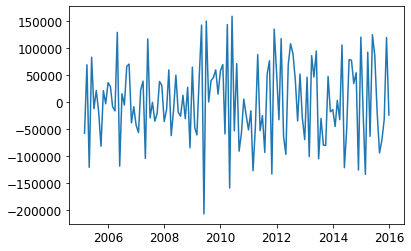

In [19]:
pasd=dpasst.dropna().diff(periods=12)[12:]
plt.plot(pasd)

#### <font color =199EDC> <b> Gráficos de Autocorrelación Serie Diferenciada</b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie de pasajeros transformada y diferenciada 2 veces.

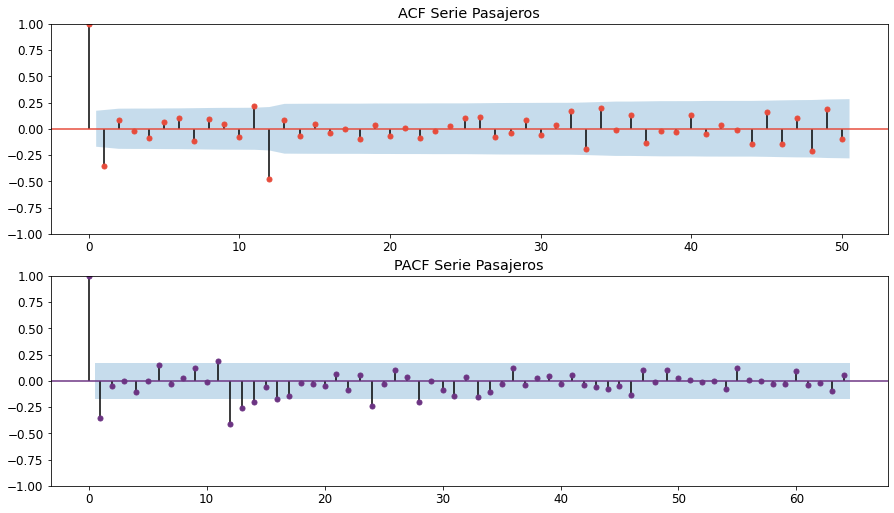

In [20]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
a=plot_acf(pasd.dropna(),adjusted=False,lags=50,title='ACF Serie Pasajeros',ax=axes[0], color='#E74C3C')
d=plot_pacf(pasd.dropna(),lags=64,title='PACF Serie Pasajeros',ax=axes[1], color = '#6C3483',method="ldbiased")
plt.show()
InteractiveShell.ast_node_interactivity = "all"

#### <font color= 199EDC> <b> Modelos </b> </font>

In [21]:
modelo_p1 = smapi.tsa.statespace.SARIMAX(train, trend='c', order=(1,1,1), seasonal_order=(2,1,1,12))  
results_finalp1 = modelo_p1.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                                     SARIMAX Results                                      
Dep. Variable:                          Pasajeros   No. Observations:                  129
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -1456.173
Date:                            Thu, 01 Dec 2022   AIC                           2926.346
Time:                                    14:49:05   BIC                           2945.621
Sample:                                01-31-2004   HQIC                          2934.170
                                     - 09-30-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2848.7255   4856.214      0.587      0.557   -6669.280    1.24e+04
ar.L1         -0.0309      0.869   

In [22]:
from sklearn.metrics import mean_squared_error

X = Pasajerosst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train, trend='c', order=(1,1,1), seasonal_order=(2,1,1,12)) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error1 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error1)


Predicción=2954277.450674, Esperado=2878213.000000
Predicción=2954277.450674, Esperado=2609268.000000
Predicción=2954277.450674, Esperado=2760926.000000
Predicción=2954277.450674, Esperado=2761351.000000
Predicción=2954277.450674, Esperado=2935706.000000
Predicción=2954277.450674, Esperado=2891739.000000
Predicción=2954277.450674, Esperado=2443929.000000
Predicción=2954277.450674, Esperado=2657885.000000
Predicción=2954277.450674, Esperado=2674087.000000
Predicción=2954277.450674, Esperado=2734858.000000
Predicción=2954277.450674, Esperado=2844116.000000
Predicción=2954277.450674, Esperado=3124327.000000
Predicción=2954277.450674, Esperado=3126943.000000
Predicción=2954277.450674, Esperado=2892721.000000
Predicción=2954277.450674, Esperado=3098859.000000
Predicción=2954277.450674, Esperado=2973901.000000
Predicción=2954277.450674, Esperado=3268703.000000
Predicción=2954277.450674, Esperado=3200132.000000
Predicción=2954277.450674, Esperado=2618865.000000
Predicción=2954277.450674, Espe

In [23]:
modelo_p1 = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(1,1,1), seasonal_order=(0,1,1,12))  
results_finalp1 = modelo_p1.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1282.199
Date:                            Thu, 01 Dec 2022   AIC                           2572.399
Time:                                    14:50:03   BIC                           2582.899
Sample:                                         0   HQIC                          2576.651
                                            - 115                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0912      0.673      0.136      0.892      -1.228       1.410
ma.L1         -0.1705      0.681   

In [24]:
from sklearn.metrics import mean_squared_error

X = Pasajerosst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12)) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error2 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error2)

Predicción=2949462.828377, Esperado=2878213.000000
Predicción=2949462.828377, Esperado=2609268.000000
Predicción=2949462.828377, Esperado=2760926.000000
Predicción=2949462.828377, Esperado=2761351.000000
Predicción=2949462.828377, Esperado=2935706.000000
Predicción=2949462.828377, Esperado=2891739.000000
Predicción=2949462.828377, Esperado=2443929.000000
Predicción=2949462.828377, Esperado=2657885.000000
Predicción=2949462.828377, Esperado=2674087.000000
Predicción=2949462.828377, Esperado=2734858.000000
Predicción=2949462.828377, Esperado=2844116.000000
Predicción=2949462.828377, Esperado=3124327.000000
Predicción=2949462.828377, Esperado=3126943.000000
Predicción=2949462.828377, Esperado=2892721.000000
Predicción=2949462.828377, Esperado=3098859.000000
Predicción=2949462.828377, Esperado=2973901.000000
Predicción=2949462.828377, Esperado=3268703.000000
Predicción=2949462.828377, Esperado=3200132.000000
Predicción=2949462.828377, Esperado=2618865.000000
Predicción=2949462.828377, Espe

In [25]:
modelofp = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(1,1,0), seasonal_order=(0,1,1,12))  
results_finalp = modelofp.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(results_finalp.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1282.269
Date:                              Thu, 01 Dec 2022   AIC                           2570.537
Time:                                      14:50:25   BIC                           2578.412
Sample:                                           0   HQIC                          2573.726
                                              - 115                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0755      0.026     -2.858      0.004      -0.127      -0.024
ma.S.L12      -0.16

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



In [26]:
from sklearn.metrics import mean_squared_error

X = Pasajerosst.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(train, trend='c', order=(1,1,0), seasonal_order=(0,1,1,12)) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error3 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error3)

Predicción=2956381.191558, Esperado=2878213.000000
Predicción=2956381.191558, Esperado=2609268.000000
Predicción=2956381.191558, Esperado=2760926.000000
Predicción=2956381.191558, Esperado=2761351.000000
Predicción=2956381.191558, Esperado=2935706.000000
Predicción=2956381.191558, Esperado=2891739.000000
Predicción=2956381.191558, Esperado=2443929.000000
Predicción=2956381.191558, Esperado=2657885.000000
Predicción=2956381.191558, Esperado=2674087.000000
Predicción=2956381.191558, Esperado=2734858.000000
Predicción=2956381.191558, Esperado=2844116.000000
Predicción=2956381.191558, Esperado=3124327.000000
Predicción=2956381.191558, Esperado=3126943.000000
Predicción=2956381.191558, Esperado=2892721.000000
Predicción=2956381.191558, Esperado=3098859.000000
Predicción=2956381.191558, Esperado=2973901.000000
Predicción=2956381.191558, Esperado=3268703.000000
Predicción=2956381.191558, Esperado=3200132.000000
Predicción=2956381.191558, Esperado=2618865.000000
Predicción=2956381.191558, Espe

#### <font color= 199EDC> <b> Outliers </b> </font>

In [27]:
print('RECM Modelo 1 SARIMA: %.3f' % error1)
print('RECM Modelo 2 SARIMA: %.3f' % error2)
print('RECM Modelo 3 SARIMA: %.3f' % error3)

RECM Modelo 1 SARIMA: 80956958789.218
RECM Modelo 2 SARIMA: 81375516469.037
RECM Modelo 3 SARIMA: 80788625178.460


Luego de seleccionar el mejor modelo a partir del RECM (Modelo 3) ajustamos outliers en R, para posteriormente ajustar el modelo de una manera más adecuada.

Crear las variables regresoras

In [28]:
xreg=np.zeros((133, 1))
a=np.append([xreg],[[1], [0.700], [0.490], [0.343], [0.240], [0.168],[0.118],[0.082], [0.058],[ 0.040], [0.028]])
xreg=np.array_split(a,144)

Ajustar modelo con las variables regresoras

In [29]:
modelop = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(1,1,0), seasonal_order=(0,1,1,12),exog=xreg[:len(train)])  
resultsp = modelop.fit(use_boxcox=False)###Dentro de los parentesis use_boxcox=False
print(resultsp.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: use_boxcox. After release 0.14, this will raise.



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1282.269
Date:                              Thu, 01 Dec 2022   AIC                           2572.537
Time:                                      14:50:31   BIC                           2583.037
Sample:                                           0   HQIC                          2576.789
                                              - 115                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0         -0        nan        nan           0           0
ar.L1         -0.07

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning:

invalid value encountered in true_divide



#### <font color= 199EDC> <b>Error cuadrático medio </b> </font>

In [30]:
## Rolling
from sklearn.metrics import mean_squared_error

X = Pasajeros.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = smapi.tsa.statespace.SARIMAX(history[0:size], trend='n', order=(1,1,0), seasonal_order=(0,1,1,12),exog=xreg[:size]) 
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast(len(test),exog=xreg[size:])
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (yhat, obs))
error4 = mean_squared_error(test, predicciones)
print('ECM: %.3f' % error4)

Predicción=3033262.405169, Esperado=3098859.000000
Predicción=3033262.405169, Esperado=2973901.000000
Predicción=3033262.405169, Esperado=3268703.000000
Predicción=3033262.405169, Esperado=3200132.000000
Predicción=3033262.405169, Esperado=2618865.000000
Predicción=3033262.405169, Esperado=2925319.000000
Predicción=3033262.405169, Esperado=2878463.000000
Predicción=3033262.405169, Esperado=3064046.000000
Predicción=3033262.405169, Esperado=3259959.000000
Predicción=3033262.405169, Esperado=3522169.000000
Predicción=3033262.405169, Esperado=3431028.000000
Predicción=3033262.405169, Esperado=3126007.000000
Predicción=3033262.405169, Esperado=3300365.000000
Predicción=3033262.405169, Esperado=3294905.000000
Predicción=3033262.405169, Esperado=3565997.000000
ECM: 78682581582.415


#### <font color= 199EDC> <b> Análisis de Residuales entrenamiento y validación</b> </font>

[[1.08423405 0.81496413]]
[[ 1.24674745  0.53613262 -0.22380585  2.69504737]]


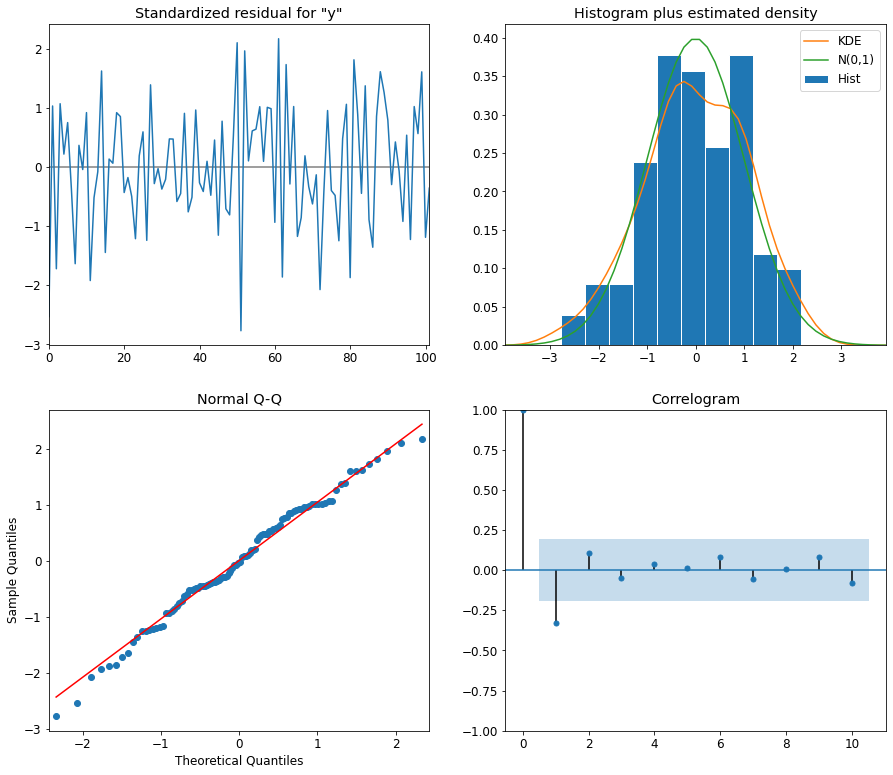

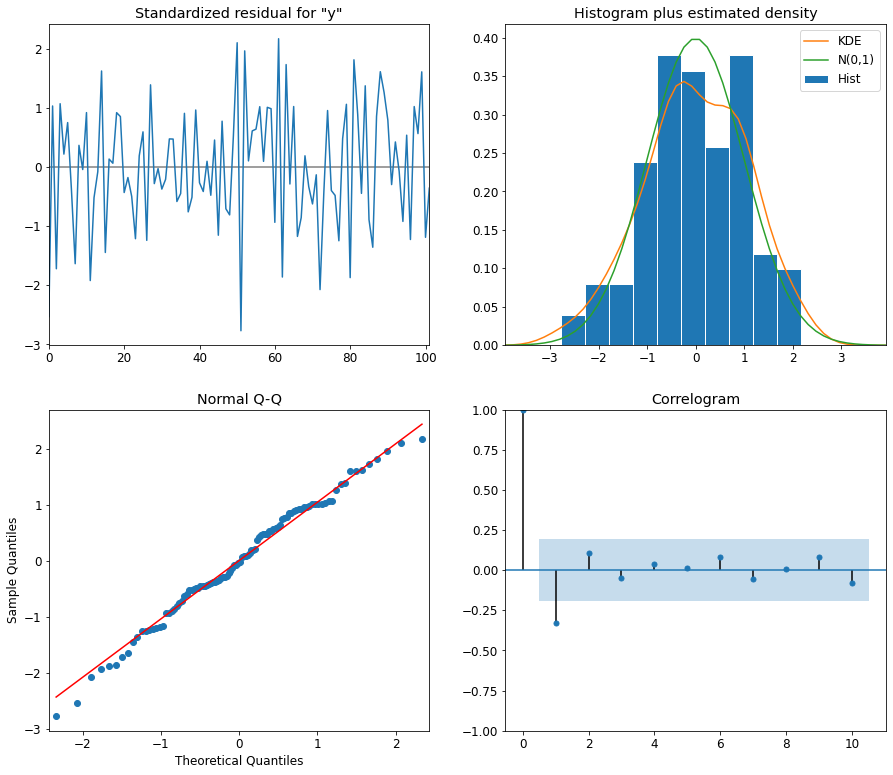

In [31]:
#####Análisis de Residuales######
results_final1 = modelofp.fit()
residuales1=results_final1.resid

## Hipótesis nula de no heterocedasticidad
print(results_final1.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
print(results_final1.test_normality(method='jarquebera'))

#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial
results_final1.plot_diagnostics(figsize=(15,13))
#plt.show()

Como se puede observar en el gráfico de autocorrelación, la correlación 1 no se encuentra bien explicada por el modelo.

#### <font color= 199EDC> <b> Gráficos de sumas acumulativas entrenamiento y validación  </b> </font>

In [32]:
##Residuales Estandarizados
Res_estand=results_final1.standardized_forecasts_error.reshape(115,)

115

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusum')

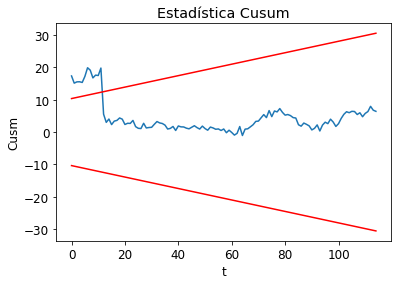

In [33]:
###Gráfico CUSUM
cum=Res_estand.cumsum()
N=len(Res_estand)
N
Af_cusum=0.948###Cuantil estadística cusum
LS=Af_cusum*math.sqrt(N)+2*Af_cusum*np.arange(1,N+1)/math.sqrt(N)
LI=-LS
plt.plot(cum)
plt.plot(LS,color='red')
plt.plot(LI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 0, 't')

Text(0, 0.5, 'Cusm')

Text(0.5, 1.0, 'Estadística Cusumsq')

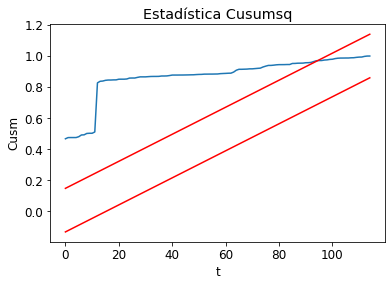

In [34]:
###Gráfico CUSUM_CUADRADO
cumq=(Res_estand**2).cumsum()/sum(Res_estand**2)
co=0.14013####Valor del cuantil aproximado para cusumsq para n/2
LQS=co+np.arange(1,N+1)/N
LQI=-co+np.arange(1,N+1)/N
plt.plot(cumq)
plt.plot(LQS,color='red')
plt.plot(LQI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

Como se ve en los gráficos los parámetros parecen ser estables en el tiempo mientras que la varianza del ruido no lo parece.

### <font color= 199EDC> <b> Modelo Redes neuronales multicapa </b> </font>

Para poder realizar el modelamiento por árboles se quita la tendencia de la serie haciendo uso del suavizamiento exponencial.

In [35]:
expopas1 = ExponentialSmoothing(Pasajerosst, seasonal_periods=12, trend='add', seasonal='add',initialization_method="estimated",use_boxcox=False).fit()
passin=Pasajerosst-expopas1.level

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



#### <font color =199EDC> <b> Gráficos de Autocorrelación Serie sin tendencia</b> </font>
Se realiza un gráfico de autocorrelaciones simples y uno de autocorrelaciones parciales para la serie sin tendencia.

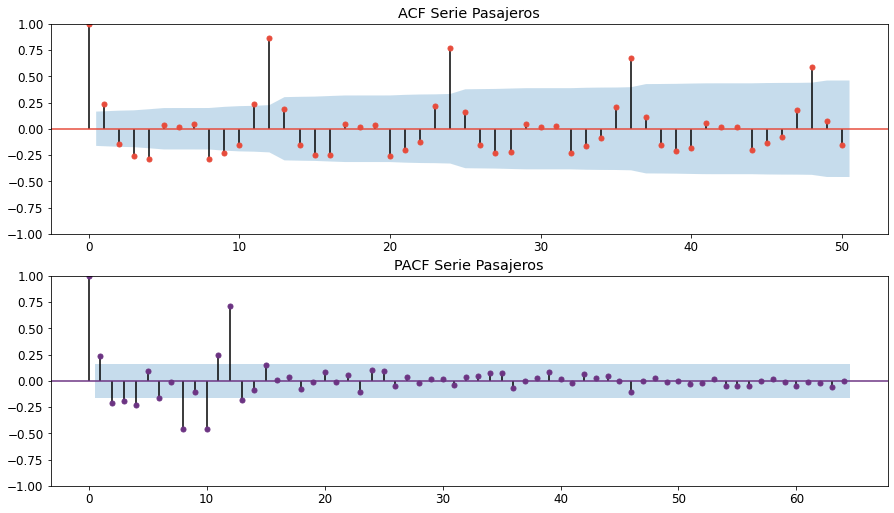

In [36]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
a=plot_acf(passin,adjusted=False,lags=50,title='ACF Serie Pasajeros',ax=axes[0], color='#E74C3C')
d=plot_pacf(passin,lags=64,title='PACF Serie Pasajeros',ax=axes[1], color = '#6C3483',method="ldbiased")
plt.show()
InteractiveShell.ast_node_interactivity = "all"

En el ACF se puede observar como las correlaciones cercanas a  múltiplos de 12 son significativas, igualmente en el PACF.

#### <font color =199EDC> <b> Variables Rezagadas</b> </font>

In [37]:
df1 = pd.DataFrame()
passindf=pd.DataFrame(passin)
passindf.set_axis(['Pasajeros'], axis=1, inplace=True)
mean_train=train_df.mean()
std_train=train_df.std()
passindf=(passindf-mean_train)/std_train
for i in range(12,0,-1):
    df1[['t-'+str(i)]] = passindf.shift(i)
    

In [38]:
# Create column t
df1['t'] = passindf.values

In [39]:
# Create a new subsetted dataframe, removing Nans from first 130 rows
df1_pas = df1[12:]
print(df1_pas)
df1_pas.size

                t-12      t-11      t-10       t-9       t-8       t-7  \
Fecha                                                                    
2005-01-31 -3.812623 -4.480503 -4.306523 -4.388315 -4.397134 -4.070818   
2005-02-28 -4.480503 -4.306523 -4.388315 -4.397134 -4.070818 -3.614481   
2005-03-31 -4.306523 -4.388315 -4.397134 -4.070818 -3.614481 -3.785094   
2005-04-30 -4.388315 -4.397134 -4.070818 -3.614481 -3.785094 -4.256064   
2005-05-31 -4.397134 -4.070818 -3.614481 -3.785094 -4.256064 -4.095459   
...              ...       ...       ...       ...       ...       ...   
2015-08-31 -3.482288 -4.221600 -3.842861 -4.151551 -3.502171 -3.742316   
2015-09-30 -4.221600 -3.842861 -4.151551 -3.502171 -3.742316 -5.152121   
2015-10-31 -3.842861 -4.151551 -3.502171 -3.742316 -5.152121 -4.348452   
2015-11-30 -4.151551 -3.502171 -3.742316 -5.152121 -4.348452 -4.491484   
2015-12-31 -3.502171 -3.742316 -5.152121 -4.348452 -4.491484 -4.151089   

                 t-6       t-5       

1716

#### <font color =199EDC> <b>Ajuste</b> </font>

In [40]:
# Split data

passplit = df1_pas.values
# split into lagged variables and original time series
X1= passplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =passplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [41]:
# Target Train-Test split
Y1 = y1
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.11, train_size=0.89,shuffle=False)
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.24, train_size=0.76,shuffle=False)

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(X_train)))
print('Validation Observations for Target: %d' % (len(X_val)))
print('Testing Observations for Target: %d' % (len(X_test)))

Observations for Target: 132
Training Observations for Target: 88
Validation Observations for Target: 29
Testing Observations for Target: 15


In [42]:
model=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),
                               keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
3/3 [==============================] - 2s 253ms/step - loss: 26.2525 - val_loss: 19.1452
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 17.4081 - val_loss: 11.9432
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 10.5371 - val_loss: 6.6412
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 5.5712 - val_loss: 3.1226
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 2.4725 - val_loss: 1.1551
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.8038 - val_loss: 0.3463
Epoch 7/50
3/3 [==============================] - 0s 62ms/step - loss: 0.2245 - val_loss: 0.2540
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2439 - val_loss: 0.4795
Epoch 9/50
3/3 [==============================] - 0s 25ms/step - loss: 0.4848 - val_loss: 0.7313
Epoch 10/50
3/3 [==============================] - 0s 45ms/step - loss: 0.6982 - val_loss: 0.8497
Epoch 11/50
3/3 [======

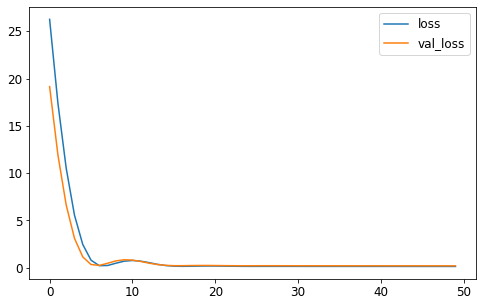

In [44]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [45]:
mse_test=model.evaluate(X_test,y_test)
print(mse_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.3383
0.33825984597206116


#### <font color =199EDC> <b> Hiperparámetros</b> </font>

In [46]:
# This returns a multi-layer-perceptron model in Keras.
def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # create the MLP model.
    
    # define the layers.
    inputs = tf.keras.Input(shape=(X_train.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Add the hidden layers.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # output layer.
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 20
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mse'])

    data = X_train
    labels = y_train
    
    # fit the model using validation_data=(X_val,y_val) validation set.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, batch_size=parameterization.get('batch_size'),
                    validation_data=(X_val,y_val))
    
    # look at the last 10 epochs. Get the mean and standard deviation of the validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [48]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 0.002],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.02],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 2],
        "value_type": "int"
    },
    {
        "name": "neurons_per_layer",
        "type": "range",
        "bounds": [16, 32],
        "value_type": "int"
    },
    {
        "name": "batch_size",
        "type": "choice",
        "values": [10, 20],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

In [49]:
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}


[INFO 12-01 14:54:48] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 12-01 14:54:49] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 12-01 14:54:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-01 14:54:49] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dropout_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 12-01 14:54:49] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batch_size. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
/usr/loca

In [50]:
for i in range(10):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index,raw_data=evaluate(parameters))

[INFO 12-01 14:54:57] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.001813, 'dropout_rate': 0.016253, 'num_hidden_layers': 1, 'neurons_per_layer': 21, 'batch_size': 10, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/20
9/9 [==============================] - 1s 21ms/step - loss: 15.6905 - mse: 15.6905 - val_loss: 13.0866 - val_mse: 13.0866
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 11.8904 - mse: 11.8904 - val_loss: 9.4396 - val_mse: 9.4396
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 8.3711 - mse: 8.3711 - val_loss: 6.0364 - val_mse: 6.0364
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 5.0926 - mse: 5.0926 - val_loss: 3.1721 - val_mse: 3.1721
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 2.5113 - mse: 2.5113 - val_loss: 1.3244 - val_mse: 1.3244
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9611 - mse: 0.9611 - val_loss: 0.4752 - val_mse: 0.4752
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3002 - mse: 0.3002 - val_loss: 0.2144 - val_mse: 0.2144
Epoch 8/20
9/9 [==============================] - 0s 5ms/step - loss: 0.1931 - mse: 0.1931 - val_

[INFO 12-01 14:55:00] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (0.196397, 0.006983)}.
[INFO 12-01 14:55:00] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.001663, 'dropout_rate': 0.014347, 'num_hidden_layers': 1, 'neurons_per_layer': 24, 'batch_size': 10, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
9/9 [==============================] - 1s 21ms/step - loss: 16.7922 - mse: 16.7922 - val_loss: 4.4004 - val_mse: 4.4004
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 1.7849 - mse: 1.7849 - val_loss: 0.3700 - val_mse: 0.3700
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.8939 - mse: 0.8939 - val_loss: 1.2734 - val_mse: 1.2734
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 1.1270 - mse: 1.1270 - val_loss: 0.2830 - val_mse: 0.2830
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3167 - mse: 0.3167 - val_loss: 0.2492 - val_mse: 0.2492
Epoch 6/20
9/9 [==============================] - 0s 9ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.2157 - val_mse: 0.2157
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 8/20
9/9 [==============================] - 0s 5ms/step - loss: 0.5223 - mse: 0.5223 - val_loss

[INFO 12-01 14:55:03] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (0.113379, 0.011547)}.
[INFO 12-01 14:55:03] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.001148, 'dropout_rate': 0.014819, 'num_hidden_layers': 1, 'neurons_per_layer': 18, 'batch_size': 10, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
9/9 [==============================] - 2s 66ms/step - loss: 16.9888 - mse: 16.9888 - val_loss: 14.1152 - val_mse: 14.1152
Epoch 2/20
9/9 [==============================] - 0s 13ms/step - loss: 12.7124 - mse: 12.7124 - val_loss: 10.1775 - val_mse: 10.1775
Epoch 3/20
9/9 [==============================] - 0s 17ms/step - loss: 9.4526 - mse: 9.4526 - val_loss: 6.7861 - val_mse: 6.7861
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 6.0438 - mse: 6.0438 - val_loss: 4.1494 - val_mse: 4.1494
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 3.5944 - mse: 3.5944 - val_loss: 2.2876 - val_mse: 2.2876
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 1.9471 - mse: 1.9471 - val_loss: 1.1872 - val_mse: 1.1872
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 1.0965 - mse: 1.0965 - val_loss: 0.6908 - val_mse: 0.6908
Epoch 8/20
9/9 [==============================] - 0s 6ms/step - loss: 0.7784 - mse: 0.7784 - 

[INFO 12-01 14:55:07] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (0.202406, 0.007728)}.
[INFO 12-01 14:55:07] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.001108, 'dropout_rate': 0.013782, 'num_hidden_layers': 2, 'neurons_per_layer': 22, 'batch_size': 10, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
9/9 [==============================] - 1s 22ms/step - loss: 7.2311 - mse: 7.2311 - val_loss: 2.3987 - val_mse: 2.3987
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 1.1361 - mse: 1.1361 - val_loss: 0.2382 - val_mse: 0.2382
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.6106 - mse: 0.6106 - val_loss: 0.6896 - val_mse: 0.6896
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 0.5681 - mse: 0.5681 - val_loss: 0.2614 - val_mse: 0.2614
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.2400 - val_mse: 0.2400
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3965 - mse: 0.3965 - val_loss: 0.2223 - val_mse: 0.2223
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.5190 - mse: 0.5190 - val_loss: 0.2005 - val_mse: 0.2005
Epoch 8/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3007 - mse: 0.3007 - val_loss: 

[INFO 12-01 14:55:09] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (0.18242, 0.003856)}.
[INFO 12-01 14:55:09] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.001436, 'dropout_rate': 0.010248, 'num_hidden_layers': 1, 'neurons_per_layer': 17, 'batch_size': 20, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
5/5 [==============================] - 1s 138ms/step - loss: 17.5718 - mse: 17.5718 - val_loss: 14.3123 - val_mse: 14.3123
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 14.0029 - mse: 14.0029 - val_loss: 11.5466 - val_mse: 11.5466
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 11.2089 - mse: 11.2089 - val_loss: 9.3635 - val_mse: 9.3635
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 9.1651 - mse: 9.1651 - val_loss: 7.5373 - val_mse: 7.5373
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 7.3618 - mse: 7.3618 - val_loss: 6.0508 - val_mse: 6.0508
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 5.9173 - mse: 5.9173 - val_loss: 4.8068 - val_mse: 4.8068
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 4.6772 - mse: 4.6772 - val_loss: 3.8202 - val_mse: 3.8202
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 3.6620 - mse: 3.6620

[INFO 12-01 14:55:12] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (0.654017, 0.40593)}.
[INFO 12-01 14:55:12] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.001557, 'dropout_rate': 0.015818, 'num_hidden_layers': 1, 'neurons_per_layer': 17, 'batch_size': 20, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
5/5 [==============================] - 1s 41ms/step - loss: 11.0246 - mse: 11.0246 - val_loss: 8.4149 - val_mse: 8.4149
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 8.2415 - mse: 8.2415 - val_loss: 6.3858 - val_mse: 6.3858
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 6.0429 - mse: 6.0429 - val_loss: 4.8361 - val_mse: 4.8361
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 4.6830 - mse: 4.6830 - val_loss: 3.5894 - val_mse: 3.5894
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 3.5842 - mse: 3.5842 - val_loss: 2.6074 - val_mse: 2.6074
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 2.6388 - mse: 2.6388 - val_loss: 1.8454 - val_mse: 1.8454
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 1.8509 - mse: 1.8509 - val_loss: 1.3059 - val_mse: 1.3059
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 1.1792 - mse: 1.1792 - val_l

[INFO 12-01 14:55:14] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (0.194435, 0.042574)}.
[INFO 12-01 14:55:14] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.001061, 'dropout_rate': 0.013993, 'num_hidden_layers': 2, 'neurons_per_layer': 29, 'batch_size': 10, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
9/9 [==============================] - 1s 25ms/step - loss: 13.0060 - mse: 13.0060 - val_loss: 5.4433 - val_mse: 5.4433
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 3.1696 - mse: 3.1696 - val_loss: 0.6724 - val_mse: 0.6724
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3508 - mse: 0.3508 - val_loss: 0.3172 - val_mse: 0.3172
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.2767 - mse: 0.2767 - val_loss: 0.5304 - val_mse: 0.5304
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3442 - mse: 0.3442 - val_loss: 0.4021 - val_mse: 0.4021
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.2217 - mse: 0.2217 - val_loss: 0.2472 - val_mse: 0.2472
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1650 - mse: 0.1650 - val_loss: 0.2125 - val_mse: 0.2125
Epoch 8/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2216 - mse: 0.2216 - val_loss

[INFO 12-01 14:55:17] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (0.194074, 0.011187)}.
[INFO 12-01 14:55:17] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.001249, 'dropout_rate': 0.01192, 'num_hidden_layers': 2, 'neurons_per_layer': 17, 'batch_size': 20, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/20
5/5 [==============================] - 1s 42ms/step - loss: 25.6077 - mse: 25.6077 - val_loss: 23.7368 - val_mse: 23.7368
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 23.7399 - mse: 23.7399 - val_loss: 22.4005 - val_mse: 22.4005
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 22.7218 - mse: 22.7218 - val_loss: 21.1356 - val_mse: 21.1356
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 21.4825 - mse: 21.4825 - val_loss: 19.9301 - val_mse: 19.9301
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 20.1688 - mse: 20.1688 - val_loss: 18.7746 - val_mse: 18.7746
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 18.9970 - mse: 18.9970 - val_loss: 17.6599 - val_mse: 17.6599
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 17.9857 - mse: 17.9857 - val_loss: 16.5803 - val_mse: 16.5803
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 16.

[INFO 12-01 14:55:19] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (9.311886, 1.876111)}.
[INFO 12-01 14:55:19] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.001071, 'dropout_rate': 0.016392, 'num_hidden_layers': 1, 'neurons_per_layer': 25, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 5.9345 - mse: 5.9345 - val_loss: 3.9384 - val_mse: 3.9384
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 3.7203 - mse: 3.7203 - val_loss: 2.1420 - val_mse: 2.1420
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 2.1528 - mse: 2.1528 - val_loss: 1.0366 - val_mse: 1.0366
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 1.0210 - mse: 1.0210 - val_loss: 0.4770 - val_mse: 0.4770
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.4380 - mse: 0.4380 - val_loss: 0.2608 - val_mse: 0.2608
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.3342 - mse: 0.3342 - val_loss: 0.2102 - val_mse: 0.2102
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.2012 - mse: 0.2012 - val_loss: 0.2245 - val_mse: 0.2245
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1816 - mse: 0.1816 - val_los

[INFO 12-01 14:55:21] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (0.21952, 0.019529)}.
[INFO 12-01 14:55:21] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.001658, 'dropout_rate': 0.013065, 'num_hidden_layers': 1, 'neurons_per_layer': 24, 'batch_size': 20, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
5/5 [==============================] - 1s 40ms/step - loss: 10.5424 - mse: 10.5424 - val_loss: 3.2914 - val_mse: 3.2914
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 2.7961 - mse: 2.7961 - val_loss: 0.6215 - val_mse: 0.6215
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.5957 - mse: 0.5957 - val_loss: 0.1667 - val_mse: 0.1667
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2767 - mse: 0.2767 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.3894 - mse: 0.3894 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.3371 - mse: 0.3371 - val_loss: 0.1867 - val_mse: 0.1867
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1979 - mse: 0.1979 - val_loss: 0.1453 - val_mse: 0.1453
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2184 - mse: 0.2184 - val_los

[INFO 12-01 14:55:22] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (0.102052, 0.018148)}.


In [ ]:
ax_client.get_trials_data_frame().sort_values('trial_index')

keras_cv  trial_index arm_name  learning_rate  dropout_rate  \
0  0.176116            0      0_0       0.001216      0.018894   
1  0.190280            1      1_0       0.001665      0.013196   
2  0.129304            2      2_0       0.001216      0.014220   
3  0.221516            3      3_0       0.001747      0.011935   
4  0.139916            4      4_0       0.001534      0.014266   
5  0.293614            5      5_0       0.001234      0.011340   
6  0.209166            6      6_0       0.001338      0.018550   
7  0.141472            7      7_0       0.001082      0.014796   
8  0.131615            8      8_0       0.001876      0.016428   
9  0.181849            9      9_0       0.001412      0.016866   

   num_hidden_layers  neurons_per_layer  batch_size activation optimizer  \
0                  2                 20          10       tanh      adam   
1                  1                 30          10    sigmoid      adam   
2                  2                 24          20       relu      adam   
3                  1                 18          20       tanh      adam   
4                  1                 26          10       tanh      adam   
5                  1                 23          10    sigmoid      adam   
6                  2                 31          10    sigmoid       rms   
7                  2                 26          10       tanh       rms   
8                  2                 26          20       tanh       rms   
9                  2                 32          10    sigmoid       rms   

  trial_status generation_method  
0    COMPLETED             Sobol  
1    COMPLETED             Sobol  
2    COMPLETED             Sobol  
3    COMPLETED             Sobol  
4    COMPLETED             Sobol  
5    COMPLETED             Sobol  
6    COMPLETED             Sobol  
7    COMPLETED             Sobol  
8    COMPLETED             Sobol  
9    COMPLETED             Sobol

In [51]:
best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
for k in best_parameters.items():
  print(k)

print()

# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.0016577421398837695)
('dropout_rate', 0.013065216717841171)
('num_hidden_layers', 1)
('neurons_per_layer', 24)
('batch_size', 20)
('activation', 'tanh')
('optimizer', 'rms')

{'keras_cv': 0.10205238163471222}


####<font color= 199EDC> <b>Modelos </b> </font>

In [52]:
model0=keras.models.Sequential([keras.layers.Dense(19,activation="tanh",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model1=keras.models.Sequential([keras.layers.Dense(29,activation="tanh",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model2=keras.models.Sequential([keras.layers.Dense(22,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(22,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(1)])

model3=keras.models.Sequential([keras.layers.Dense(26,activation="relu",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(26,activation="relu",input_shape=X_train.shape[1:],batch_size=20),
                               keras.layers.Dense(1)])

model4=keras.models.Sequential([keras.layers.Dense(32,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(32,activation="relu",input_shape=X_train.shape[1:],batch_size=10),
                               keras.layers.Dense(1)])
model.summary(),model1.summary(),model2.summary(),model3.summary(),model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (20, 29)                  377       
                                                                 
 dense_28 (Dense)            (20, 1)                   30        
                                                                 
Total params: 407
Trainable params: 

(None, None, None, None, None)

In [53]:
model0.compile(loss="mean_squared_error",optimizer="rmsprop")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model1.compile(loss="mean_squared_error",optimizer="adam")
history1=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model2.compile(loss="mean_squared_error",optimizer="rmsprop")
history2=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model3.compile(loss="mean_squared_error",optimizer="adam")
history3=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

model4.compile(loss="mean_squared_error",optimizer="adam")
history4=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
3/3 [==============================] - 0s 36ms/step - loss: 0.1433 - val_loss: 0.2072
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1429 - val_loss: 0.2067
Epoch 3/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1426 - val_loss: 0.2063
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1421 - val_loss: 0.2056
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1415 - val_loss: 0.2051
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1411 - val_loss: 0.2046
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1407 - val_loss: 0.2042
Epoch 8/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1401 - val_loss: 0.2035
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1395 - val_loss: 0.2028
Epoch 10/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1391 - val_loss: 0.2020
Epoch 11/50
3/3 [============

In [54]:
pred2=model0.predict(X_test)
pred2=((pred2*(std_train.values))+mean_train.values)[:,0]+expopas1.level[129:]

pred21=model1.predict(X_test)
pred21=((pred21*(std_train.values))+mean_train.values)[:,0]+expopas1.level[129:]

pred22=model2.predict(X_test)
pred22=((pred22*(std_train.values))+mean_train.values)[:,0]+expopas1.level[129:]

pred23=model3.predict(X_test)
pred23=((pred23*(std_train.values))+mean_train.values)[:,0]+expopas1.level[129:]

pred24=model4.predict(X_test)
pred24=((pred24*(std_train.values))+mean_train.values)[:,0]+expopas1.level[129:]

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 54ms/step


In [55]:
error_multicapa0 = mean_squared_error((y_test*std_train.values)+mean_train.values+expopas1.level[129:], pred2)
print('ECM: %.3f' % error_multicapa0)

error_multicapa1 = mean_squared_error((y_test*std_train.values)+mean_train.values+expopas1.level[129:], pred21)
print('ECM: %.3f' % error_multicapa1)

error_multicapa2 = mean_squared_error((y_test*std_train.values)+mean_train.values+expopas1.level[129:], pred22)
print('ECM: %.3f' % error_multicapa2)

error_multicapa3 = mean_squared_error((y_test*std_train.values)+mean_train.values+expopas1.level[129:], pred23)
print('ECM: %.3f' % error_multicapa3)

error_multicapa4 = mean_squared_error((y_test*std_train.values)+mean_train.values+expopas1.level[129:], pred24)
print('ECM: %.3f' % error_multicapa4)

ECM: 3103723644383.341
ECM: 2032970180453.468
ECM: 2889642863852.952
ECM: 754745064322.213
ECM: 10095959416959.432


Teniendo en cuenta los ECM de cada modelo, se tiene que el mejor es el modelo con dos capas, 32 neuronas por capa y un tamaño de lote de 10. Correspondiente al ECM de 754745064322.213

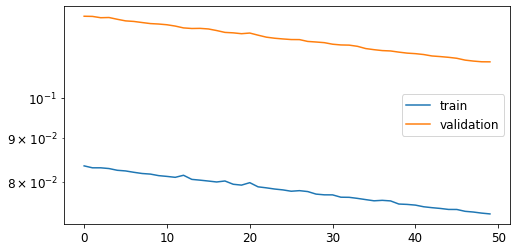

In [56]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(history4.history['loss'], label='train')
plt.semilogy(history4.history['val_loss'], label='validation')
plt.legend();

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

##### Entrenamiento y validación

In [57]:
residuales21=y_train_full-model4.predict(X_train_full)[:,0]

4/4 [==============================] - 0s 4ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



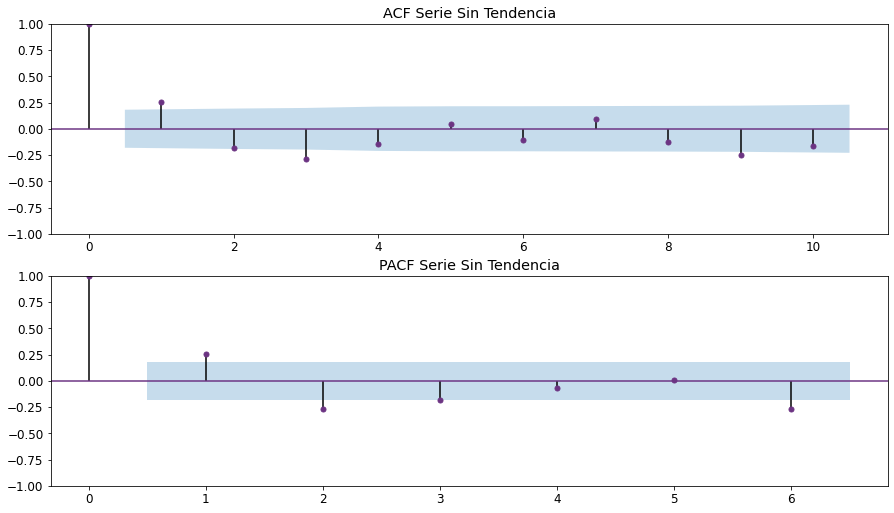

In [58]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales21,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales21,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen varias las correlaciones, tanto parciales como simples.

##### Prueba

In [60]:
residuales2=y_test-model4.predict(X_test)[:,0]

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



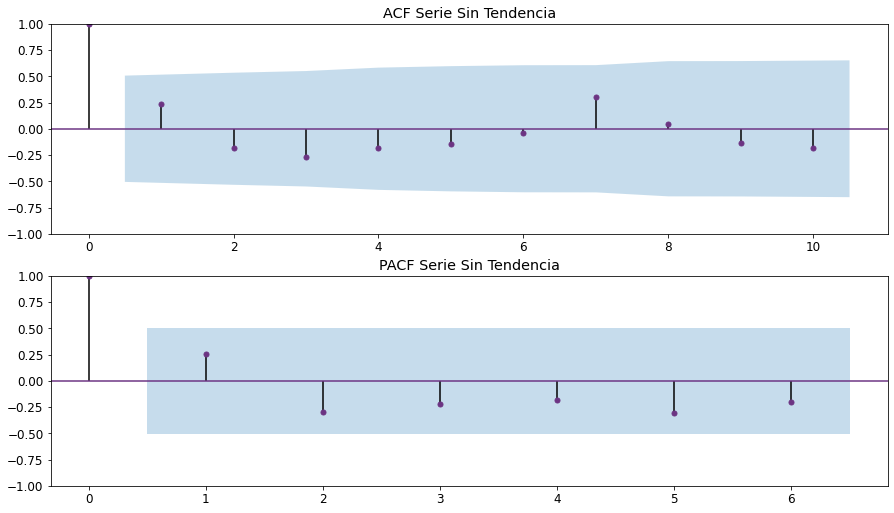

In [61]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales2,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales2,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Ninguna correlación se sale.

In [66]:
train_pred_mlp=(model4.predict(X_train)[:,0]*std_train.values)+mean_train.values
test_pred_mlp=(model4.predict(X_test)[:,0]*std_train.values)+mean_train.values

1/1 [==============================] - 0s 30ms/step


### <font color= 199EDC> <b> Modelo Redes neuronales LSTM </b> </font>

In [81]:
features=['Pasajeros']
pacf = sm.tsa.stattools.pacf(Pasajeros[features], nlags=30)
T = len(Pasajeros[features])

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)
for i in range(len(pacf)):
    if sig_test(pacf[i]) == False:
        n_steps = i - 1
        print('n_steps set to', n_steps)
        break

n_steps set to 1


In [82]:
train_weight = 0.8
split = int(len(Pasajeros) * train_weight)

Pas_train = Pasajeros[features].iloc[:split]
Pas_test = Pasajeros[features].iloc[split:]

In [83]:
mu = float(Pas_train.mean())
sigma = float(Pas_train.std())

stdize_input = lambda x: (x - mu) / sigma

Pas_train = Pas_train.apply(stdize_input)
Pas_test = Pas_test.apply(stdize_input)

In [84]:
n_steps_ahead = 2
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e. sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    lag_array = np.dstack([i[n_steps+n_steps_ahead-1:] for i in lag_list])
    # We swap the last two dimensions so each slice along the first dimension
    # is the same shape as the corresponding segment of the input time series 
    lag_array = np.swapaxes(lag_array, 1, -1)
    return lag_array

In [92]:
x_train = get_lagged_features(Pas_train, n_steps, n_steps_ahead)
y_train =  Pas_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = Pas_train.index[n_steps + n_steps_ahead - 1:]

x_test = get_lagged_features(Pas_test, n_steps, n_steps_ahead)
y_test =  Pas_test.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = Pas_test.index[n_steps + n_steps_ahead - 1:]

In [86]:
def LSTM_(n_units = 64, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True)) 
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [87]:
max_epochs = 50 #Dejar mil
batch_size = 10

In [88]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, min_delta=1e-7, restore_best_weights=True)

In [89]:
params = {
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 10, 
        'color':'red', 'label': 'LSTM'}
}
params

{'lstm': {'model': None,
  'function': <function __main__.LSTM_(n_units=64, l1_reg=0.0, seed=0)>,
  'l1_reg': 0.0,
  'H': 10,
  'color': 'red',
  'label': 'LSTM'}}

In [90]:
do_training = True 
params.keys()

dict_keys(['lstm'])

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
import tensorflow as tf

cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    n_units = [5, 10, 20]
    l1_reg = [0, 0.001, 0.01, 0.1]
    
    # A dictionary containing a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}
    
    # In the kth split, TimeSeriesSplit returns first k folds 
    # as training set and the (k+1)th fold as test set.
    tscv = TimeSeriesSplit(n_splits = 5)
    
    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=params[key]['function'], epochs=max_epochs, 
                               batch_size=batch_size, verbose=2)
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(x_train, y_train, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))
            
        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Performing cross-validation. Model: lstm
Fitting 5 folds for each of 12 candidates, totalling 60 fits


<ipython-input-91-9d55593fe86c>:23: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Se han truncado las últimas 5000 líneas del flujo de salida.
6/6 - 0s - loss: 5.6820 - 18ms/epoch - 3ms/step
Epoch 6/50
6/6 - 0s - loss: 5.5666 - 17ms/epoch - 3ms/step
Epoch 7/50
6/6 - 0s - loss: 5.4569 - 23ms/epoch - 4ms/step
Epoch 8/50
6/6 - 0s - loss: 5.3467 - 20ms/epoch - 3ms/step
Epoch 9/50
6/6 - 0s - loss: 5.2337 - 21ms/epoch - 3ms/step
Epoch 10/50
6/6 - 0s - loss: 5.1174 - 18ms/epoch - 3ms/step
Epoch 11/50
6/6 - 0s - loss: 5.0008 - 23ms/epoch - 4ms/step
Epoch 12/50
6/6 - 0s - loss: 4.8835 - 19ms/epoch - 3ms/step
Epoch 13/50
6/6 - 0s - loss: 4.7630 - 21ms/epoch - 4ms/step
Epoch 14/50
6/6 - 0s - loss: 4.6362 - 18ms/epoch - 3ms/step
Epoch 15/50
6/6 - 0s - loss: 4.5105 - 19ms/epoch - 3ms/step
Epoch 16/50
6/6 - 0s - loss: 4.3812 - 21ms/epoch - 3ms/step
Epoch 17/50
6/6 - 0s - loss: 4.2465 - 17ms/epoch - 3ms/step
Epoch 18/50
6/6 - 0s - loss: 4.1111 - 17ms/epoch - 3ms/step
Epoch 19/50
6/6 - 0s - loss: 3.9709 - 18ms/epoch - 3ms/step
Epoch 20/50
6/6 - 0s - loss: 3.8280 - 22ms/epoch - 4ms/

 El mejor modelo es el {'l1_reg': 0, 'n_units': 20}

In [96]:
if do_training is True:
    for key in params.keys():
        tf.random.set_seed(0)
        print('Training', key, 'model')
        model = params[key]['function'](params[key]['H'], params[key]['l1_reg'])
        model.fit(x_train, y_train, epochs=max_epochs, 
                  batch_size=batch_size, callbacks=[es], shuffle=False)
        params[key]['model'] = model

Training lstm model
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 1.6606
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.5872
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 1.5306
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4781
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4282
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3801
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 1.3336
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2884
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2442
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2008
Epoch 11/50
12/12 [==============================] - 0s 3ms/step - loss: 1.1580
Epoch 12/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1158
Epoch 13/50
12/12 [==========

In [103]:
for key in params.keys():
    params[key]['model'].save('pasajeros-SAVED-' + key + '.hdf5', overwrite=True) 

In [104]:
if do_training is False:
     for key in params.keys():
        params[key]['model']=keras.models.load_model('pasajeros-SAVED-' + key + '.hdf5')

In [105]:
for key in params.keys():
    model = params[key]['model']
    model.summary()
    
    params[key]['pred_train'] = model.predict(x_train, verbose=1)
    params[key]['MSE_train'] = mean_squared_error(y_train, params[key]['pred_train'])
    
    params[key]['pred_test'] = model.predict(x_test, verbose=1) 
    params[key]['MSE_test'] = mean_squared_error(y_test, params[key]['pred_test'])

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 20)                1760      
                                                                 
 dense_144 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 25ms/step


In [117]:
train_pred_lstm=(model.predict(x_train, verbose=1)[:,0]*std_train.values)+mean_train.values
test_pred_lstm=(model.predict(x_test, verbose=1)[:,0]*std_train.values)+mean_train.values
ECM_lstm=mean_squared_error(y_test, test_pred_lstm)
print(ECM_lstm)

1/1 [==============================] - 0s 34ms/step
5315969214559.781


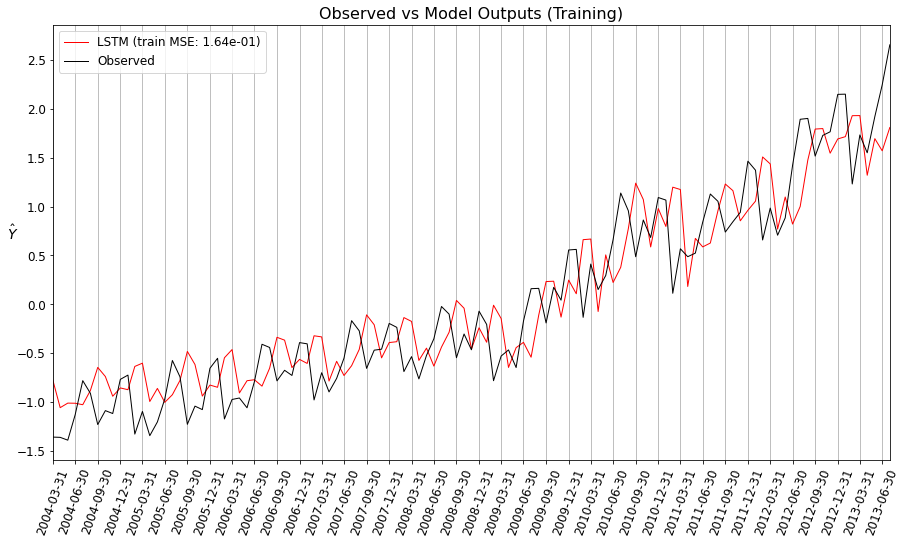

In [107]:
from datetime import datetime
max_pts = 10**4
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable. 

fig = plt.figure(figsize=(15,8))
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds]
    label = params[key]['label'] + ' (train MSE: %.2e)' % params[key]['MSE_train']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_train[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Training)', fontsize=16);

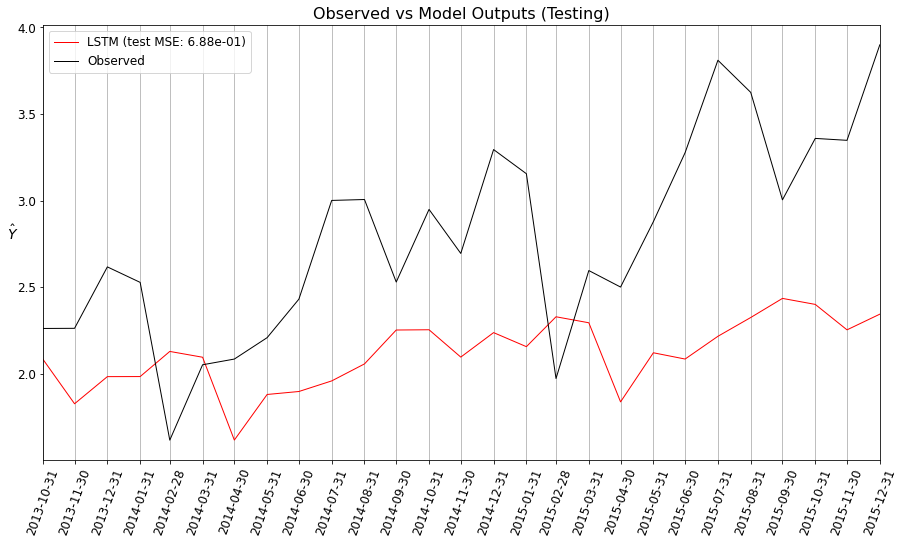

In [108]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds]
    label = params[key]['label'] + ' (test MSE: %.2e)' % params[key]['MSE_test']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_test[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
x_vals=x_vals[::max(1,len(x_vals)//30)]
for t in x_vals: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(x_vals, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Testing)', fontsize=16);

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

##### Entrenamiento

In [118]:
residuales21=x_train[:,0][:,0]-model.predict(x_train)[:,0]

4/4 [==============================] - 0s 3ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



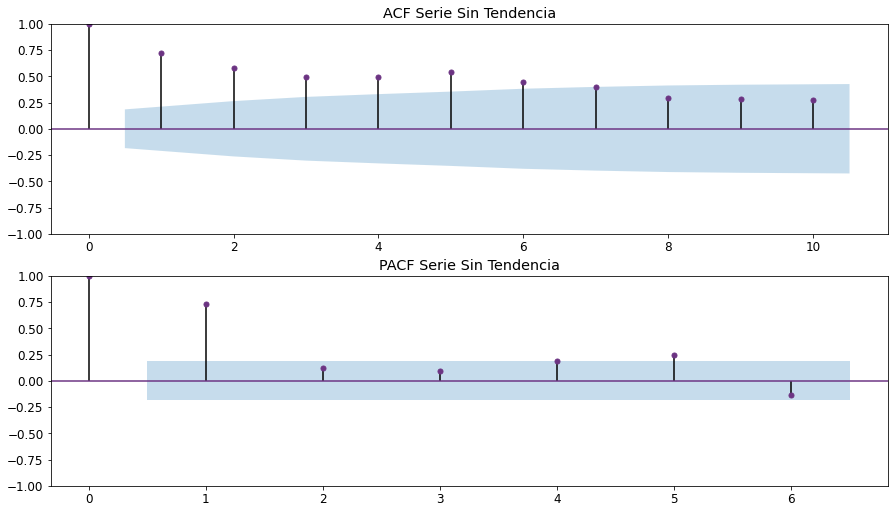

In [119]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales21,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales21,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se salen casi todas las correlaciones simples y unas pocas parciales.

##### Prueba

In [120]:
residuales2=y_test[:,0]-model.predict(x_test)[:,0]

1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



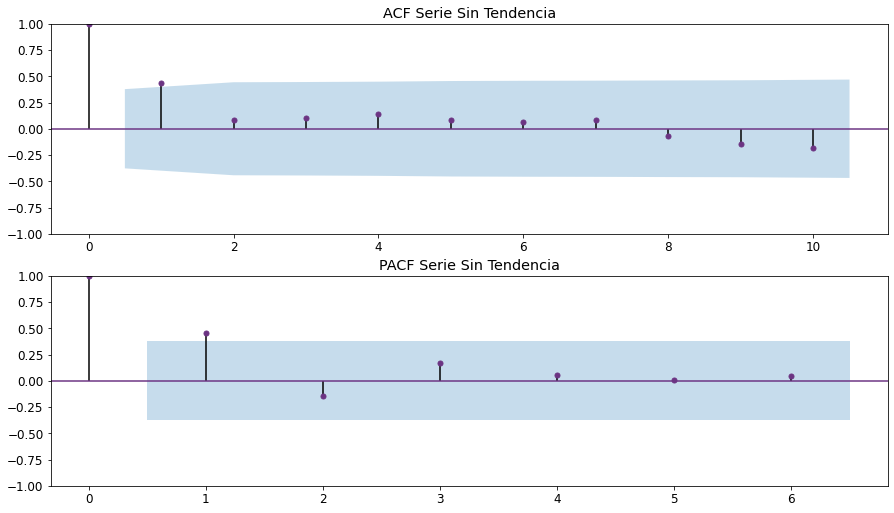

In [121]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residuales2,adjusted=False,lags=10,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residuales2,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se sale únicamente la primera autocorrelación, tanto en las simples como en las parciales

### <font color= 199EDC> <b> Árboles </b> </font>


Para poder realizar el modelamiento por árboles se quita la tendencia de la serie haciendo uso del suavizamiento exponencial.

In [124]:
df1 = pd.DataFrame()
pasdf=pd.DataFrame(passin)

In [125]:
df2 = pd.DataFrame()
print(df2)

Empty DataFrame
Columns: []
Index: []


Se eligen 12 retardos a partir de los gráficos de autocorrelación mostrados en el modelamiento anterior

In [126]:
for i in range(12,0,-1):
    df2[['t-'+str(i)]] = pasdf.shift(i)
df2['t'] = pasdf.values 
df2_pas = df2[12:]
print(df2_pas.head(12))
df2_pas.shape

                     t-12           t-11           t-10            t-9  \
Fecha                                                                    
2005-01-31  101891.700584 -146203.520314  -81575.845134 -111958.685774   
2005-02-28 -146203.520314  -81575.845134 -111958.685774 -115234.555308   
2005-03-31  -81575.845134 -111958.685774 -115234.555308    5980.942431   
2005-04-30 -111958.685774 -115234.555308    5980.942431  175494.959422   
2005-05-31 -115234.555308    5980.942431  175494.959422  112117.561327   
2005-06-30    5980.942431  175494.959422  112117.561327  -62831.815762   
2005-07-31  175494.959422  112117.561327  -62831.815762   -3172.403064   
2005-08-31  112117.561327  -62831.815762   -3172.403064  -26281.414947   
2005-09-30  -62831.815762   -3172.403064  -26281.414947  135226.516813   
2005-10-31   -3172.403064  -26281.414947  135226.516813  132502.677850   
2005-11-30  -26281.414947  135226.516813  132502.677850 -159672.891570   
2005-12-31  135226.516813  132502.6778

(132, 13)

In [127]:
# Split data
passplit = df2_pas.values
# split into lagged variables and original time series
X1 = passplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = passplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [128]:
# Target Train-Test split
Y1 = y1
train_target,val_target, test_target = Y1[:88],Y1[88:117],Y1[117:]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 132
Training Observations for Target: 88
Validation Observations for Target: 29
Testing Observations for Target: 15


In [129]:
# Features Train-Test split

train_feature, val_feature, test_feature = X1[:88],X1[88:117],X1[117:] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Validation Observations for Target: %d' % (len(val_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 132
Training Observations for feature: 88
Validation Observations for Target: 29
Testing Observations for feature: 15


In [130]:
# Decision Tree Regresion Model

# Create a decision tree regression model with default arguments
decision_tree_expo = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_expo.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_expo.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de prueba:",decision_tree_expo.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM es:",(((decision_tree_expo.predict(test_feature)-test_target)**2).sum())**0.5)

DecisionTreeRegressor()

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de prueba: 0.831176127277351
el RECM es: 278689.0026395289


In [131]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,6,7,8,9,10,11]:
    # Create the tree and fit it
    decision_tree_expo = DecisionTreeRegressor(max_depth=d)
    decision_tree_expo.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_expo.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de prueba:",decision_tree_expo.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de prueba es:",sklearn.metrics.mean_squared_error(decision_tree_expo.predict(val_feature),val_target, squared=False))

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8885370623620069
Coeficiente R2 sobre el conjunto de prueba: 0.7880644739160432 

el RECM sobre el conjunto de prueba es: 71471.73497492413


DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9447518302980417
Coeficiente R2 sobre el conjunto de prueba: 0.8519235547804809 

el RECM sobre el conjunto de prueba es: 59741.40520380943


DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9744898015209474
Coeficiente R2 sobre el conjunto de prueba: 0.8596656573947196 

el RECM sobre el conjunto de prueba es: 58158.66458438511


DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9899687383193188
Coeficiente R2 sobre el conjunto de prueba: 0.8502749536097503 

el RECM sobre el conjunto de prueba es: 60073.0485428552


DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9950612315165848
Coeficiente R2 sobre el conjunto de prueba: 0.9207600554934134 

el RECM sobre el conjunto de prueba es: 43702.32324436608


DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9977607676701723
Coeficiente R2 sobre el conjunto de prueba: 0.8587568787885991 

el RECM sobre el conjunto de prueba es: 58346.67294366241


DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9989138945646
Coeficiente R2 sobre el conjunto de prueba: 0.819171913448256 

el RECM sobre el conjunto de prueba es: 66018.45963457001


DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9995554872022212
Coeficiente R2 sobre el conjunto de prueba: 0.912189817567624 

el RECM sobre el conjunto de prueba es: 46004.983928677844


DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9999011613916513
Coeficiente R2 sobre el conjunto de prueba: 0.830465739272361 

el RECM sobre el conjunto de prueba es: 63923.59363568885


DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 0.999986024968812
Coeficiente R2 sobre el conjunto de prueba: 0.8190043403866335 

el RECM sobre el conjunto de prueba es: 66049.04214474976


Podemos observar como el RECM obtiene el mínimo en d=4

DecisionTreeRegressor(max_depth=4)

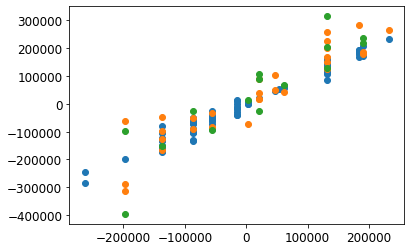

Raíz de la Pérdida cuadrática Entrenamiento: 19285.538429868117
Raíz de la Pérdida cuadrática Validación: 61517.41403797001
Raíz de la Pérdida cuadrática Prueba: 86391.28904583618


In [132]:
from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_expo = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_expo.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_expo.predict(train_feature)
val_prediction = decision_tree_expo.predict(val_feature)
test_prediction = decision_tree_expo.predict(test_feature)


# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(val_prediction, val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_prediction + expopas1.level[12:100], 
                                                                                        train_target+ expopas1.level[12:100],squared=False))
print("Raíz de la Pérdida cuadrática Validación:",sklearn.metrics.mean_squared_error( val_prediction+ expopas1.level[100:129], 
                                                                                     val_target+ expopas1.level[100:129],squared=False))
print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error( test_prediction+ expopas1.level[129:], 
                                                                                 test_target+ expopas1.level[129:],squared=False))

In [133]:
from sklearn import tree

listacaract=list(df2_pas.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_expo)
print(text_representation)

|--- feature_0 <= 8967.89
|   |--- feature_0 <= -62260.67
|   |   |--- feature_5 <= 189453.38
|   |   |   |--- feature_6 <= -17817.80
|   |   |   |   |--- value: [-86963.06]
|   |   |   |--- feature_6 >  -17817.80
|   |   |   |   |--- value: [-137507.69]
|   |   |--- feature_5 >  189453.38
|   |   |   |--- feature_1 <= -49076.33
|   |   |   |   |--- value: [-197124.95]
|   |   |   |--- feature_1 >  -49076.33
|   |   |   |   |--- value: [-263457.10]
|   |--- feature_0 >  -62260.67
|   |   |--- feature_7 <= 64056.88
|   |   |   |--- feature_2 <= 115120.04
|   |   |   |   |--- value: [-55376.27]
|   |   |   |--- feature_2 >  115120.04
|   |   |   |   |--- value: [-14965.84]
|   |   |--- feature_7 >  64056.88
|   |   |   |--- feature_8 <= -165890.70
|   |   |   |   |--- value: [53505.04]
|   |   |   |--- feature_8 >  -165890.70
|   |   |   |   |--- value: [2659.79]
|--- feature_0 >  8967.89
|   |--- feature_2 <= 97505.59
|   |   |--- feature_10 <= -61232.43
|   |   |   |--- feature_2 <= -5

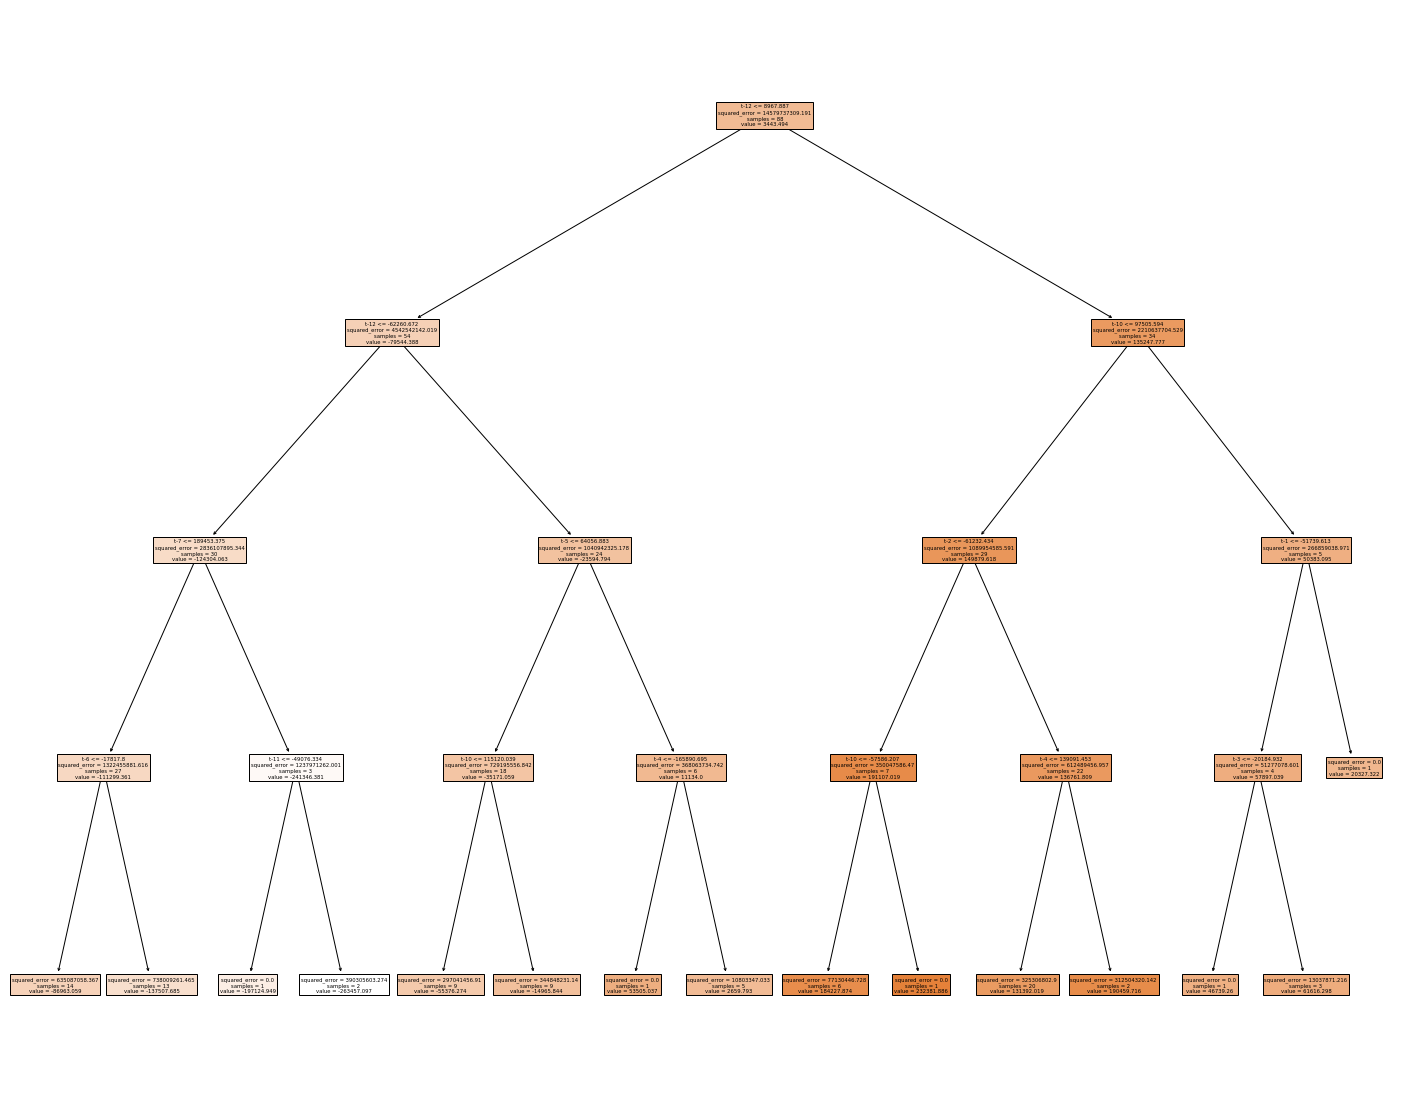

In [134]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_expo, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

In [135]:
print(train_prediction.size)
print(train_target.size)

print(val_prediction.size)
print(val_target.size)


print(test_prediction.size)
print(test_target.size)

88
88
29
29
15
15


In [136]:
indicetrian_test=df2_pas.index
indicetrain=indicetrian_test[:88]
indiceval=indicetrian_test[88:117]
indicetest=indicetrian_test[117:]

In [137]:
print(indicetrain.size)
print(indiceval.size)
print(indicetest.size)

88
29
15


In [138]:
targetjoint=np.concatenate((train_target+expopas1.level[12:100], val_target + expopas1.level[100:129]
                            ,test_target + expopas1.level[129:]))
predictionjoint=np.concatenate((train_prediction + expopas1.level[12:100],val_prediction + expopas1.level[100:129],
                                test_prediction + expopas1.level[129:]))
print(targetjoint.size)
print(predictionjoint.size)

132
132


In [139]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

observado    Predicción
Fecha                              
2005-01-31  1294228.0  1.293117e+06
2005-02-28   997867.0  1.020032e+06
2005-03-31  1111761.0  1.086487e+06
2005-04-30   989965.0  1.009933e+06
2005-05-31  1059038.0  1.073029e+06
2005-06-30  1174180.0  1.169453e+06
2005-07-31  1367642.0  1.365234e+06
2005-08-31  1285418.0  1.311146e+06
2005-09-30  1047016.0  1.065263e+06
2005-10-31  1138365.0  1.135115e+06

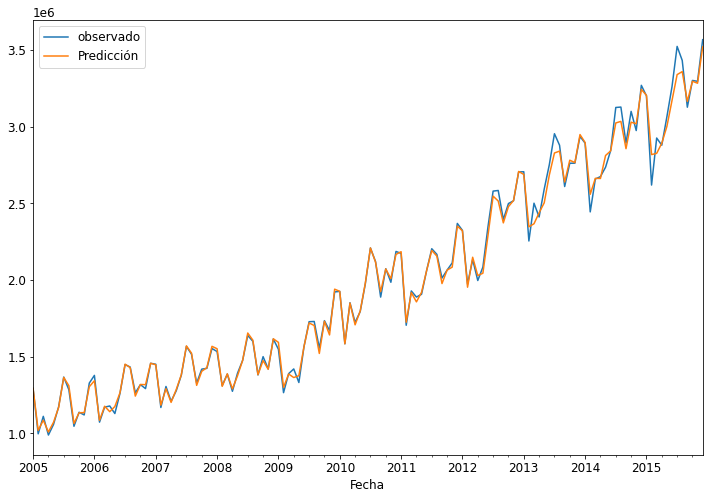

In [140]:
ax = ObsvsPred.plot(figsize=(12,8))

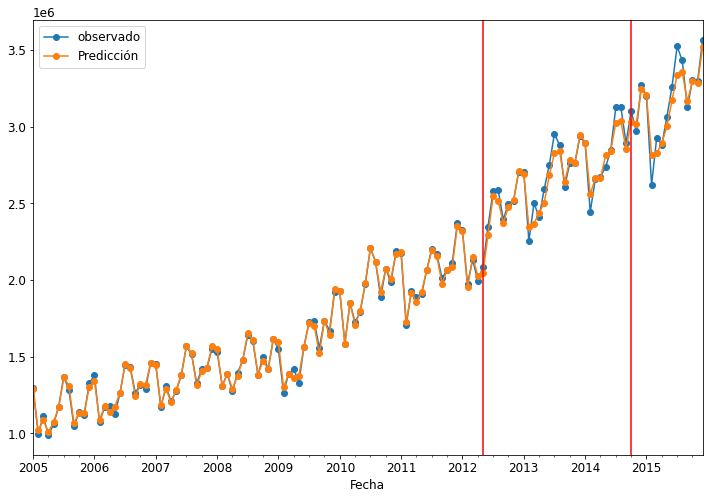

In [141]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[88].date(),color='red')
ax.axvline(x=indicetrian_test[117].date(),color='red')

#### <font color= 199EDC> <b> Análisis de Residuales </b> </font>

#### <font color= 199EDC> <b> ACF y PACF  </b> </font>

In [142]:
residualessss=test-np.split(test_prediction,15)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



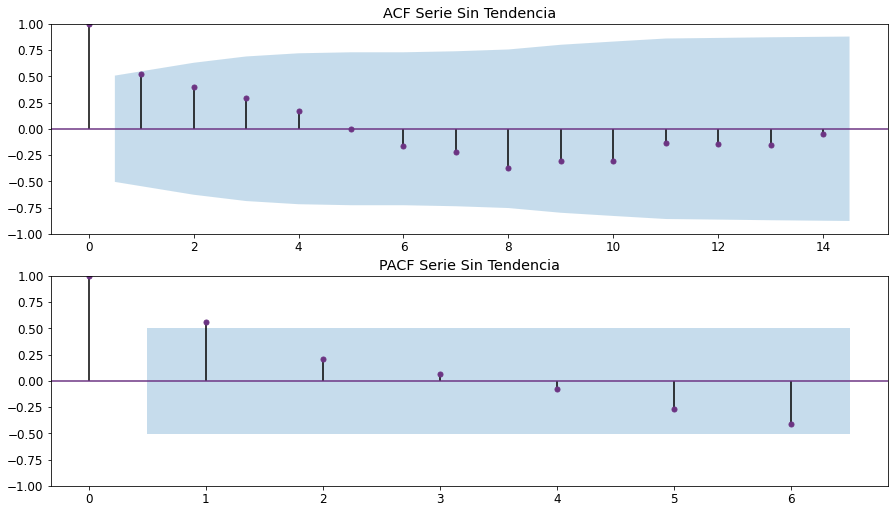

In [143]:
InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,8.5)) 
b=plot_acf(residualessss,adjusted=False,lags=14,title='ACF Serie Sin Tendencia',ax=axes[0], color='#6C3483')
d=plot_pacf(residualessss,lags=6,title='PACF Serie Sin Tendencia',ax=axes[1], color = '#6C3483')
plt.show()
InteractiveShell.ast_node_interactivity = "all"

Se puede observar como todos los valores del ACF y PACF estan bien explicados.

In [144]:
errorAR =sklearn.metrics.mean_squared_error( test_prediction+ expopas1.level[129:], 
                                           test_target+ expopas1.level[129:],squared=False)
print("RECM Árboles:",errorAR)

RECM Árboles: 86391.28904583618


### <font color= 199EDC> <b> Comparación de modelos </b> </font>

In [145]:
print("RECM ARIMA con componentes de Fourier:",error4**.5)
print('RECM Redes Multicapa:', error_multicapa3**.5)
print("RECM LSTM:",ECM_lstm**.5)
print('RECM Arboles:', errorAR**.5)

RECM ARIMA con componentes de Fourier: 280504.15608759713
RECM Redes Multicapa: 868760.6484655096
RECM LSTM: 2305638.5698022535
RECM Arboles: 293.9239511265392


<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted ')

Text(0, 0.5, 'Pasajeros')

Text(0.5, 0, 'Index')

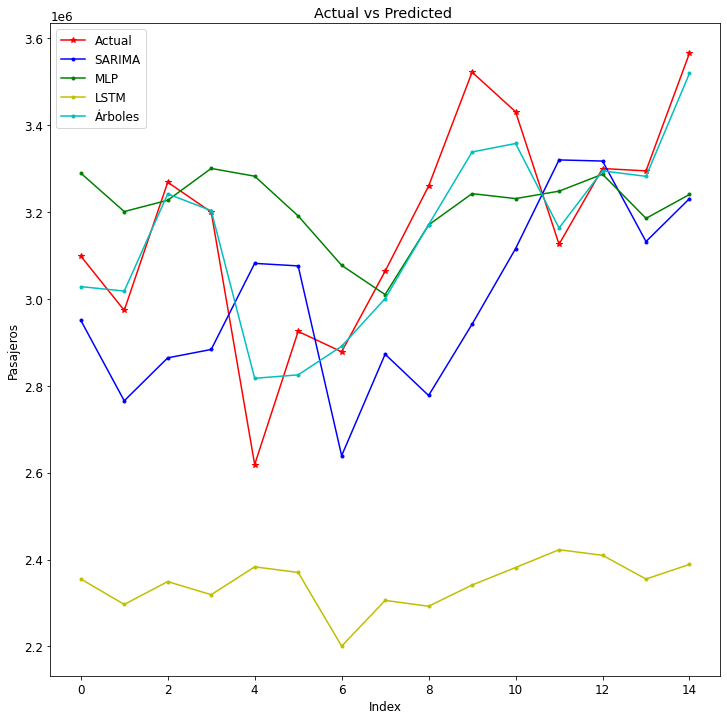

In [177]:
pronosticos=results_final1.forecast(steps=15)
ar_Pred=ObsvsPred['Predicción'][117:]
plt.figure(figsize=(12, 12))
plt.plot(range(15), test_df['Pasajeros'], linestyle='-', marker='*', color='r')
plt.plot(range(15), pronosticos, linestyle='-', marker='.', color='b')  
plt.plot(range(15), test_pred_mlp, linestyle='-', marker='.', color='g')  
plt.plot(range(15), test_pred_lstm[12:], linestyle='-', marker='.', color='y')
plt.plot(range(15), ar_Pred, linestyle='-', marker='.', color='c')  
plt.legend(['Actual','SARIMA','MLP','LSTM','Árboles'], loc=2)
plt.title('Actual vs Predicted ')
plt.ylabel('Pasajeros')
plt.xlabel('Index')

In [159]:
pronosticos

array([2950991.99459849, 2765640.06381223, 2864513.04576096,
       2883780.01213911, 3081990.94145022, 3076172.42108117,
       2639236.0672182 , 2872899.66643922, 2777832.59775   ,
       2942011.66143913, 3115835.78571835, 3320136.91613367,
       3317564.63457472, 3132229.10642551, 3231100.85010445])